In [97]:
import numpy as np
import matplotlib.pyplot as plt

def CreateListFunctions():
    function = list()
    function.append(lambda x: np.sin(x ** 2))
    function.append(lambda x: np.cos(np.sin(x)))
    function.append(lambda x: np.exp(np.sin(np.cos(x))))
    function.append(lambda x: np.log(x + 3))
    function.append(lambda x: (x + 3) ** 0.5)
    name = list(["sin(x^2)", "cos(sin(x))", "e^{sin(cos(x))}", "ln(x + 3)", "(x + 3)^{0,5}"])
    return function, name

def CreateListDerivatives() -> list:
    derivative = list()
    derivative.append(lambda x: 2 * x * np.cos(x ** 2))
    derivative.append(lambda x: - np.cos(x) * np.sin(np.sin(x)))
    derivative.append(lambda x: - np.exp(np.sin(np.cos(x))) * np.sin(x) * np.cos(np.cos(x)))
    derivative.append(lambda x: 1 / (x + 3))
    derivative.append(lambda x: 1 / (2 * (x + 3) ** 0.5))
    return derivative

def CreateListMethods():
    method = list()
    method.append(lambda f, x, h: (f(x + h) - f(x)) / h)
    method.append(lambda f, x, h: (f(x) - f(x - h)) / h)
    method.append(lambda f, x, h: (f(x + h) - f(x - h)) / (2 * h))
    method.append(lambda f, x, h: 4/3 * (f(x + h) - f(x - h)) / (2 * h) - 1/3 * (f(x + 2 * h) - f(x - 2 * h)) / (4 * h))
    method.append(lambda f, x, h: 3/2 * (f(x + h) - f(x - h)) / (2 * h) - 3/5 * (f(x + 2 * h) - f(x - 2 * h)) / (4 * h) + 1/10 * (f(x + 3 * h) - f(x - 3 * h)) / (6 * h))
    name = list(["$o(h)$", "$o(h)$", "$o(h^2)$", "$o(h^3)$", "$o(h^4)$"])
    return method, name

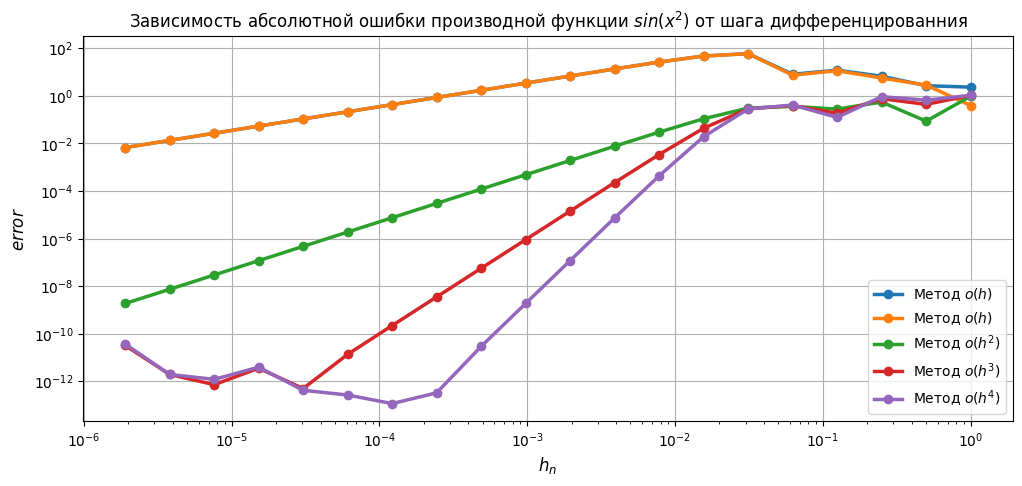

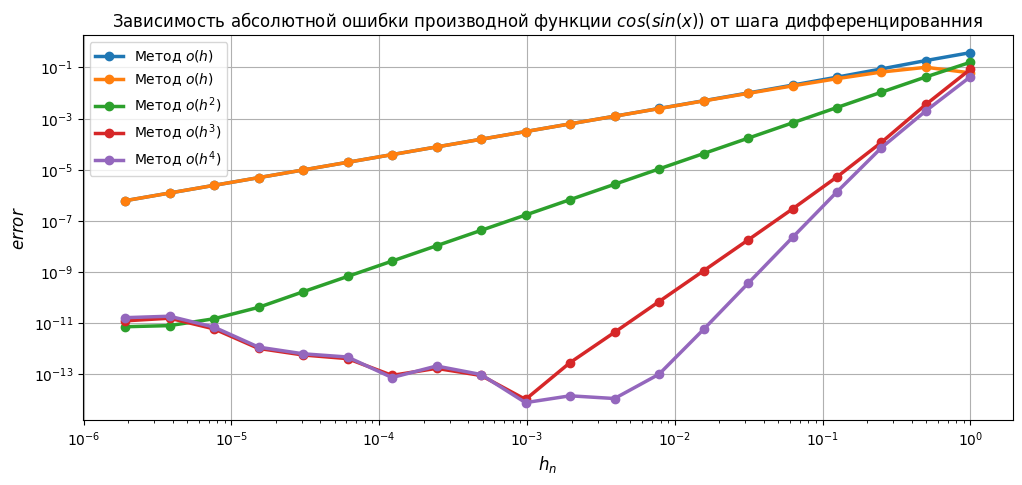

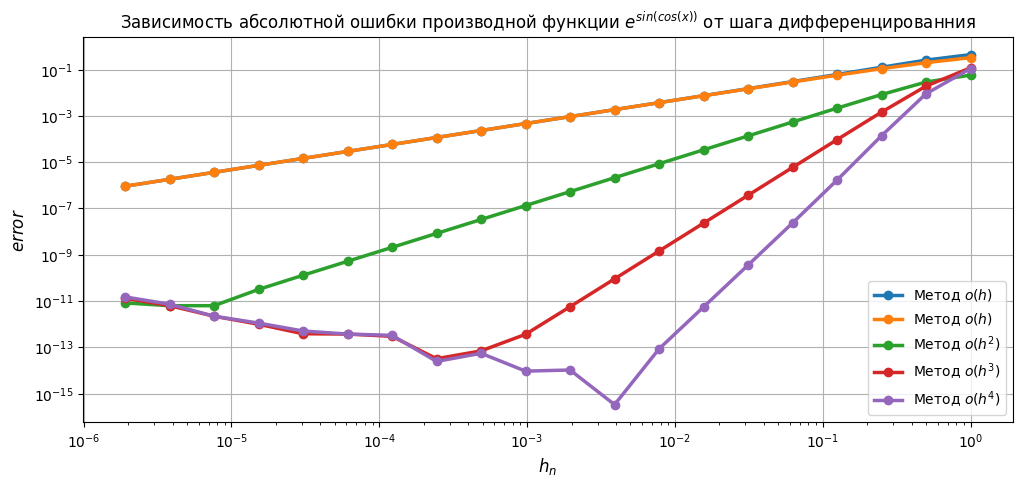

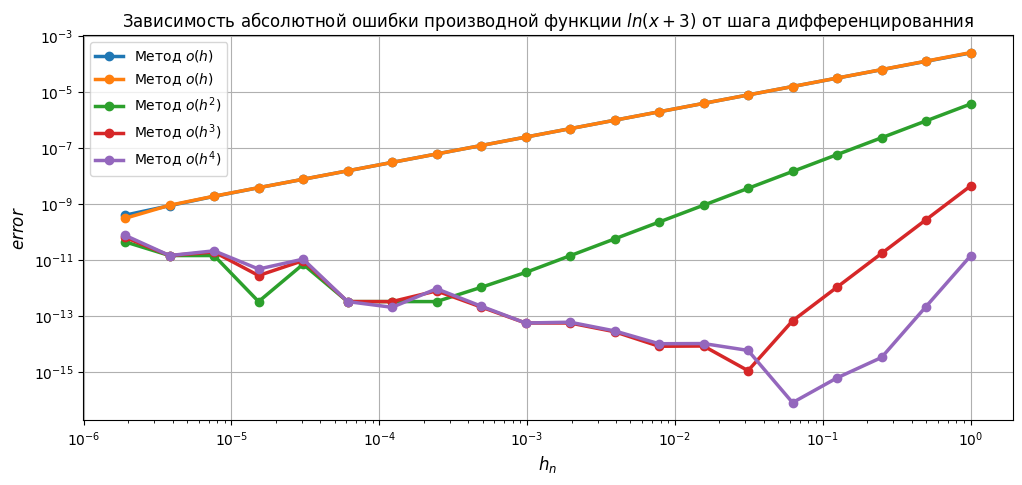

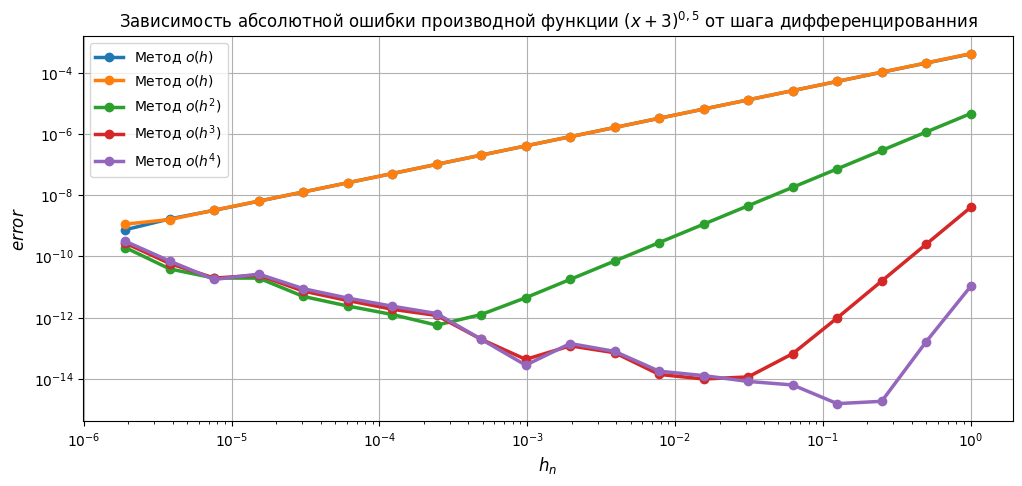

In [102]:
def main():
    functions, func_names = CreateListFunctions()
    methods, method_names = CreateListMethods()
    derivatives           = CreateListDerivatives()

    value = 42
    step  = np.array([2 ** (1 - n) for n in range(1, 21)])

    for derivative, function, name in zip(derivatives, functions, func_names):
        analytic_value = derivative(value)
        figure = plt.figure(figsize=[12, 5])
        axes = figure.add_subplot()

        for method, method_name in zip(methods, method_names):
            calc_values = np.array([method(function, value, h) for h in step])
            error = np.abs(calc_values - analytic_value)
            axes.plot(step, error, marker="o", linewidth='2.5', label="Метод " + method_name)

        axes.legend()
        axes.loglog()
        axes.set_xlabel("$h_n$", fontsize=13)
        axes.set_ylabel("$error$", fontsize=13)
        axes.grid(1)
        axes.set_title("Зависимость абсолютной ошибки производной функции $" + name + "$ от шага дифференцированния")
        figure.savefig(f"Pictures/Function_" + name)

main()